In [37]:
## IMPORTS
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go

In [2]:
## VARIABLES
SEARCH_PATH = '../youtube_channels/output/'
JSON_FILE = 'trendings-brasileirao3.json'
TRENDINS_PATH = '../datasets/trendings.json'

In [3]:
## GET RESULT SEARCH DATAFRAME FROM JSON FILE
def readSearchResult():
    try:
        df = pd.read_json(SEARCH_PATH + JSON_FILE, encoding='utf-8')
        return df
    except ValueError as ve:
        print(ve)
        return None
    
df_search = readSearchResult()
df_search.head(5)

,channel_name,channel_account,channel_url,subscribers,num_videos,num_views,last_avg_likes,last_avg_views,last_avg_comments,keywords
0,[tab BRasileirão],[@tabbrasileirao],[https://www.youtube.com/@tabbrasileirao/videos],[133000],[13000],[1053577],[5],[649.65],[0.15],"[tab brasileirao, tabela brasileirao, campeona..."
1,[ge],[@geglobo],[https://www.youtube.com/@geglobo/videos],[517000000],[16000],[2993804212],[3905.75],[132017.45],[361.4],"[futebol, ge, globoesporte, globo, brasileirão..."
2,[ESPN Brasil],[@espnbrasil],[https://www.youtube.com/@espnbrasil/videos],[635000000],[37000],[4188451631],[5541.1],[145446.95],[190.65],"[Futebol, Brasil, FUTEBOL BRASILEIRO, EUROPA L..."
3,[CazéTV],[@CazeTV],[https://www.youtube.com/@CazeTV/videos],[163000000],[72000],[2044152971],[4667.7],[111003.45],[112.95],"[Cazé TV, Cazé, Casimiro, CazéTV, Brasileirão ..."
4,[TNT Sports Brasil],[@TNTSportsBR],[https://www.youtube.com/@TNTSportsBR/videos],[112000000],[85000],[3010554832],[3772.25],[59755.95],[252.95],"[esporte interativo, tnt sports, tnt sports br..."


In [4]:
## REMOVE VALUES FROM ARRAY (BRACKETS)
df_search['channel_name'] = df_search['channel_name'].str.get(0)
df_search['channel_account'] = df_search['channel_account'].str.get(0)
df_search['channel_url'] = df_search['channel_url'].str.get(0)
df_search['subscribers'] = df_search['subscribers'].str.get(0)
df_search['num_views'] = df_search['num_views'].str.get(0)
df_search['num_videos'] = df_search['num_videos'].str.get(0)
df_search['last_avg_likes'] = df_search['last_avg_likes'].str.get(0)
df_search['last_avg_views'] = df_search['last_avg_views'].str.get(0)
df_search['last_avg_comments'] = df_search['last_avg_comments'].str.get(0)
df_search.head(5)

,channel_name,channel_account,channel_url,subscribers,num_videos,num_views,last_avg_likes,last_avg_views,last_avg_comments,keywords
0,tab BRasileirão,@tabbrasileirao,https://www.youtube.com/@tabbrasileirao/videos,133000,13000,1053577,5.00,649.65,0.15,"[tab brasileirao, tabela brasileirao, campeona..."
1,ge,@geglobo,https://www.youtube.com/@geglobo/videos,517000000,16000,2993804212,3905.75,132017.45,361.40,"[futebol, ge, globoesporte, globo, brasileirão..."
2,ESPN Brasil,@espnbrasil,https://www.youtube.com/@espnbrasil/videos,635000000,37000,4188451631,5541.10,145446.95,190.65,"[Futebol, Brasil, FUTEBOL BRASILEIRO, EUROPA L..."
3,CazéTV,@CazeTV,https://www.youtube.com/@CazeTV/videos,163000000,72000,2044152971,4667.70,111003.45,112.95,"[Cazé TV, Cazé, Casimiro, CazéTV, Brasileirão ..."
4,TNT Sports Brasil,@TNTSportsBR,https://www.youtube.com/@TNTSportsBR/videos,112000000,85000,3010554832,3772.25,59755.95,252.95,"[esporte interativo, tnt sports, tnt sports br..."


In [5]:
## CONVERT DATA TYPES
df_search = df_search.convert_dtypes()
df_search.dtypes

channel_name         string[python]
channel_account      string[python]
channel_url          string[python]
subscribers                   Int64
num_videos                    Int64
num_views                     Int64
last_avg_likes              Float64
last_avg_views              Float64
last_avg_comments           Float64
keywords                     object
dtype: object

In [6]:
## ADDING NEW COLUMNS
df_search.loc[:, ["num_trend_videos","mean_trend_likes","mean_trend_views","mean_trend_comments"]] = 0
df_search.describe()

,subscribers,num_videos,num_views,last_avg_likes,last_avg_views,last_avg_comments,num_trend_videos,mean_trend_likes,mean_trend_views,mean_trend_comments
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,196382500.0,42700.0,1308713409.5,2700.545,56845.735,152.35,0.0,0.0,0.0,0.0
std,232125498.070548,27149.994884,1592527595.679936,1918.765545,53135.255666,125.612227,0.0,0.0,0.0,0.0
min,133000.0,13000.0,1053577.0,5.0,649.65,0.15,0.0,0.0,0.0,0.0
25%,552500.0,18750.0,86189617.5,967.625,22465.0875,56.1375,0.0,0.0,0.0,0.0
50%,137500000.0,35000.0,291020363.5,3112.775,31411.55,114.65,0.0,0.0,0.0,0.0
75%,314750000.0,68750.0,2756391401.75,3924.65,98191.575,237.375,0.0,0.0,0.0,0.0
max,635000000.0,85000.0,4188451631.0,5541.1,145446.95,361.4,0.0,0.0,0.0,0.0


In [7]:
## GET RESULT SEARCH DATAFRAME FROM JSON FILE
def readTrendings():
    try:
        df = pd.read_json(TRENDINS_PATH, encoding='utf-8')
        return df
    except ValueError as ve:
        print(ve)
        return None

df_trendings = readTrendings()
df_trendings.head(10)

,video_name,video_channel_name,video_url,rank_trend,likes,views,comments,trending_start_date,trending_end_date,video_channel_account,keywords
0,"Anúncio de Plata, Alcaraz no CT e Pedro no cam...",FLA TV,https://www.youtube.com/watch?v=aQlxkX11Z8U,"[#6, #8]",14176,155632,257.0,1725062400000,1725148800000,@flamengo,"[flatv, fla tv, flamengo, Mengo, Mengão, Futeb..."
1,O mistério do jogo mais macabro do Roblox,Goularte,https://www.youtube.com/watch?v=XoCeJhACk8E,"[#5, #5]",38038,375723,1553.0,1725062400000,1725148800000,@G0ularte,"[g0ularte, goularte, comentários]"
2,MC Luuky - Nem Ligo pro Amor 💔 (Clipe Oficial)...,MC Luuky,https://www.youtube.com/watch?v=aRu1y9A4orU,"[#16, #14]",19345,332533,8135.0,1725062400000,1725148800000,@mcluuky,"[MC Luuky, Desacato, Te Levei pro Beco, Vou pa..."
3,Grupo Menos é Mais - Coração Partido (Clipe Of...,Grupo Menos é Mais,https://www.youtube.com/watch?v=n5wxZ_OBUXk,"[#6, #4]",35897,1234773,1241.0,1725062400000,1725148800000,@GrupoMenosEMais,"[pagode, recaída, vai me dando corda, cantor d..."
4,FLOOR 2 ENDING + ALL CUTSCENES & BOSSES! - DOO...,Rizado,https://www.youtube.com/watch?v=IXFKvV0hx20,"[#8, #7]",42133,2056323,3960.0,1725062400000,1725148800000,@RizadoGames,[]
5,skibidi toilet 77 (part 2),DaFuq!?Boom!,https://www.youtube.com/watch?v=x1HMTr0mp8U,"[#2, #1]",628782,9206247,48373.0,1725062400000,1725148800000,@DaFuqBoom,[]
6,"Raphinha brilha com hat-trick, e Barcelona atr...",ESPN Brasil,https://www.youtube.com/watch?v=TwrJup8dY1w,"[#1, #3]",69967,1188512,3354.0,1725062400000,1725148800000,@espnbrasil,"[Futebol, Brasil, FUTEBOL BRASILEIRO, EUROPA L..."
7,Qualifying Highlights | 2024 Italian Grand Prix,FORMULA 1,https://www.youtube.com/watch?v=0ZAc44H69wY,"[#3, #2]",75299,3313281,2771.0,1725062400000,1725148800000,@Formula1,"[F1, Formula One, Formula 1]"
8,Discover the BEST Autumn Festivities in Hay Day!,Hay Day,https://www.youtube.com/watch?v=WaVyT0fcSkw,"[#12, #10]",14795,631021,804.0,1725062400000,1725148800000,@hayday,"[hay day, iphone, ipad, android, game, app, su..."
9,Liniker - CAJU (Visual Experience),Liniker,https://www.youtube.com/watch?v=9nbYJm9FYa0,"[#17, #15]",2198,48461,56.0,1725062400000,1725148800000,@oficialliniker,[]


In [8]:
## FUNCTIONS TO GET TRENDING DATA
## GETTING NUM TRENDING VIDEOS (VALIDATE FROM CHANNEL ACCOUNT)
def getNumTrendingVideos(channel_account):
    return df_trendings[df_trendings['video_channel_account'] == channel_account]['video_url'].count()

## GETTING MEAN TRENDINGS
def getMeansTrendingsVideos(channel_account, column):
    return round(df_trendings[df_trendings['video_channel_account'] == channel_account][column].mean(), 2)

## TESTING 
print(getNumTrendingVideos('@espnbrasil'))
print(getMeansTrendingsVideos('@espnbrasil', 'likes'))

10
53782.2


In [9]:
## ADDING NEW VALUES IN SEARCH RESULT
for index, row in df_search.iterrows():
    if not df_trendings[df_trendings['video_channel_account'] == row['channel_account']].empty:
        df_search.loc[index,['num_trend_videos']] = getNumTrendingVideos(row['channel_account'])
        df_search.loc[index, ['mean_trend_likes']] = getMeansTrendingsVideos(row['channel_account'], 'likes')
        df_search.loc[index, ['mean_trend_views']] = getMeansTrendingsVideos(row['channel_account'], 'views')
        df_search.loc[index, ['mean_trend_comments']] = getMeansTrendingsVideos(row['channel_account'], 'comments')

df_search

C:\Users\dlpires\AppData\Local\Temp\ipykernel_17656\1603091801.py:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '28934.53' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\dlpires\AppData\Local\Temp\ipykernel_17656\1603091801.py:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '888902.47' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\dlpires\AppData\Local\Temp\ipykernel_17656\1603091801.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3319.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,channel_name,channel_account,channel_url,subscribers,num_videos,num_views,last_avg_likes,last_avg_views,last_avg_comments,keywords,num_trend_videos,mean_trend_likes,mean_trend_views,mean_trend_comments
0,tab BRasileirão,@tabbrasileirao,https://www.youtube.com/@tabbrasileirao/videos,133000,13000,1053577,5.0,649.65,0.15,"[tab brasileirao, tabela brasileirao, campeona...",0,0.00,0.00,0.0
1,ge,@geglobo,https://www.youtube.com/@geglobo/videos,517000000,16000,2993804212,3905.75,132017.45,361.4,"[futebol, ge, globoesporte, globo, brasileirão...",19,28934.53,888902.47,2245.0
2,ESPN Brasil,@espnbrasil,https://www.youtube.com/@espnbrasil/videos,635000000,37000,4188451631,5541.1,145446.95,190.65,"[Futebol, Brasil, FUTEBOL BRASILEIRO, EUROPA L...",10,53782.20,1321639.50,3319.4
3,CazéTV,@CazeTV,https://www.youtube.com/@CazeTV/videos,163000000,72000,2044152971,4667.7,111003.45,112.95,"[Cazé TV, Cazé, Casimiro, CazéTV, Brasileirão ...",5,283272.20,10963998.20,1168.4
4,TNT Sports Brasil,@TNTSportsBR,https://www.youtube.com/@TNTSportsBR/videos,112000000,85000,3010554832,3772.25,59755.95,252.95,"[esporte interativo, tnt sports, tnt sports br...",2,67575.00,1588408.50,2900.5
5,Canal GOAT,@canalgoatbr,https://www.youtube.com/@canalgoatbr/videos,362000000,21000,343747272,656.5,25692.2,29.15,"[goat, canal goat, futebol ao vivo, transmissõ...",10,20872.80,509653.20,72.2
6,Sport Club Internacional,@scinternacional,https://www.youtube.com/@scinternacional/videos,398000,33000,51343037,898.8,9731.35,45.15,"[clube, do, povo, inter, beira-rio, futebol, p...",2,5325.00,49585.50,221.0
7,Canal do VSR,@CanaldoVSR,https://www.youtube.com/@CanaldoVSR/videos,458000,18000,64512681,3930.95,37130.9,325.65,"[vsr, vsranking, tnt sports, Vitor Sérgio Rodr...",1,6954.00,85786.00,1372.0
8,Fluminense Football Club,@fluminensefc,https://www.youtube.com/@fluminensefc/videos,836000,59000,151220427,2453.3,21415.45,89.1,"[Fluminense, tricolor, futebol, canal oficial,...",1,7227.00,42912.00,264.0
9,Confederação Brasileira de Futebol,@CBF,https://www.youtube.com/@CBF/videos,173000000,73000,238293455,1174.1,25614.0,116.35,"[Seleção, Seleção Brasileira, CBF TV, Futebol,...",1,24623.00,744464.00,126.0


# RUNNING A FATORIAL/PCA CLASSIFICATION (UNSUPERVISED MACHINE LEARNING)

In [10]:
## GET DATAFRAME INFORMATION
df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channel_name         10 non-null     string 
 1   channel_account      10 non-null     string 
 2   channel_url          10 non-null     string 
 3   subscribers          10 non-null     Int64  
 4   num_videos           10 non-null     Int64  
 5   num_views            10 non-null     Int64  
 6   last_avg_likes       10 non-null     Float64
 7   last_avg_views       10 non-null     Float64
 8   last_avg_comments    10 non-null     Float64
 9   keywords             10 non-null     object 
 10  num_trend_videos     10 non-null     int64  
 11  mean_trend_likes     10 non-null     float64
 12  mean_trend_views     10 non-null     float64
 13  mean_trend_comments  10 non-null     float64
dtypes: Float64(3), Int64(3), float64(3), int64(1), object(1), string(3)
memory usage: 1.3+ KB


In [11]:
## DESCRIBING DATA
df_search.describe()

,subscribers,num_videos,num_views,last_avg_likes,last_avg_views,last_avg_comments,num_trend_videos,mean_trend_likes,mean_trend_views,mean_trend_comments
count,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.000000,1.000000e+01,10.000000
mean,196382500.0,42700.0,1308713409.5,2700.545,56845.735,152.35,5.100000,49856.573000,1.619535e+06,1168.850000
std,232125498.070548,27149.994884,1592527595.679936,1918.765545,53135.255666,125.612227,6.118279,84887.757557,3.331097e+06,1255.937312
min,133000.0,13000.0,1053577.0,5.0,649.65,0.15,0.000000,0.000000,0.000000e+00,0.000000
25%,552500.0,18750.0,86189617.5,967.625,22465.0875,56.1375,1.000000,7022.250000,5.863562e+04,149.750000
50%,137500000.0,35000.0,291020363.5,3112.775,31411.55,114.65,2.000000,22747.900000,6.270586e+05,716.200000
75%,314750000.0,68750.0,2756391401.75,3924.65,98191.575,237.375,8.750000,47570.282500,1.213455e+06,2026.750000
max,635000000.0,85000.0,4188451631.0,5541.1,145446.95,361.4,19.000000,283272.200000,1.096400e+07,3319.400000


In [12]:
## REMOVING QUALITY VARIABLES
df_pca = df_search.drop(columns=['channel_name', 'channel_account', 'channel_url', 'keywords'])

## CONVERT VARIABLE TYPES TO NUMPY TYPES (NECESSARY FOR BARTLLET'S TEST)
df_pca['last_avg_likes'] = df_pca['last_avg_likes'].astype(np.float64)
df_pca['last_avg_views'] = df_pca['last_avg_views'].astype(np.float64)
df_pca['last_avg_comments'] = df_pca['last_avg_comments'].astype(np.float64)
df_pca['mean_trend_likes'] = df_pca['mean_trend_likes'].astype(np.float64)
df_pca['mean_trend_views'] = df_pca['mean_trend_views'].astype(np.float64)
df_pca['mean_trend_comments'] = df_pca['mean_trend_comments'].astype(np.float64)
df_pca['subscribers'] = df_pca['subscribers'].astype(np.int64)
df_pca['num_videos'] = df_pca['num_videos'].astype(np.int64)
df_pca['num_views'] = df_pca['num_views'].astype(np.int64)
df_pca['num_trend_videos'] = df_pca['num_trend_videos'].astype(np.int64)

df_pca.head(5)

,subscribers,num_videos,num_views,last_avg_likes,last_avg_views,last_avg_comments,num_trend_videos,mean_trend_likes,mean_trend_views,mean_trend_comments
0,133000,13000,1053577,5.00,649.65,0.15,0,0.00,0.00,0.0
1,517000000,16000,2993804212,3905.75,132017.45,361.40,19,28934.53,888902.47,2245.0
2,635000000,37000,4188451631,5541.10,145446.95,190.65,10,53782.20,1321639.50,3319.4
3,163000000,72000,2044152971,4667.70,111003.45,112.95,5,283272.20,10963998.20,1168.4
4,112000000,85000,3010554832,3772.25,59755.95,252.95,2,67575.00,1588408.50,2900.5


In [13]:
##  GET DF_PCA INFO
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subscribers          10 non-null     int64  
 1   num_videos           10 non-null     int64  
 2   num_views            10 non-null     int64  
 3   last_avg_likes       10 non-null     float64
 4   last_avg_views       10 non-null     float64
 5   last_avg_comments    10 non-null     float64
 6   num_trend_videos     10 non-null     int64  
 7   mean_trend_likes     10 non-null     float64
 8   mean_trend_views     10 non-null     float64
 9   mean_trend_comments  10 non-null     float64
dtypes: float64(6), int64(4)
memory usage: 932.0 bytes


In [14]:
## ANALYZING PEARSON CORRELATION

# CORRELATION MATRIX

corr = df_pca.corr()

## GRAPHICS

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.3f}',
        colorscale='viridis'))

fig.update_layout(
    height = 750,
    width = 750,
    yaxis=dict(autorange="reversed"))

fig.show()

In [15]:
## Bartlett's Test of Sphericity and Get P value
bartlett, p_value = calculate_bartlett_sphericity(df_pca)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')


Qui² Bartlett: 249.58
p-valor: 0.0


In [17]:
### PCA DEFINING (PRINCIPAL METHOD) --> TEST
fa = FactorAnalyzer(n_factors=10, method='principal', rotation=None).fit(df_pca)
eigenvalues = fa.get_eigenvalues()[0]

np.count_nonzero(eigenvalues > 1)

3

In [19]:
## PCA DEFINING NUM FACTORS (DERIVATIVE) FUNCTION
def getNumFactors(num_factors):
    fa = FactorAnalyzer(n_factors=num_factors, method='principal', rotation=None).fit(df_pca)
    eigenvalues = fa.get_eigenvalues()[0]

    ## APPLYING KAISER CRITERIA (EIGENVALUES > 1) = FOUR FACTORS
    return np.count_nonzero(eigenvalues > 1)

In [20]:
## APPLYING KAISER CRITERIA (EIGENVALUES > 1) = FOUR FACTORS
### PCA DEFINING (PRINCIPAL METHOD)
num_factors = getNumFactors(len(df_pca.columns))
fa = FactorAnalyzer(n_factors=num_factors, method='principal', rotation=None).fit(df_pca)
eigenvalues = fa.get_eigenvalues()[0]

print(eigenvalues)

[5.32566347e+00 2.39226030e+00 1.17566848e+00 6.16986004e-01
 2.97424761e-01 1.21677082e-01 4.52882487e-02 2.44077122e-02
 6.23944014e-04 1.63725659e-16]


In [35]:
## GETTING FACTOR VARIANCE AND PLOT TABLE

eigenvalues_factors = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(eigenvalues_factors)
tabela_eigen.columns = [f"fator_{i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
fator_1   5.325663   0.532566             0.532566
fator_2   2.392260   0.239226             0.771792
fator_3   1.175668   0.117567             0.889359


C:\Users\dlpires\AppData\Local\Temp\ipykernel_17656\4247155332.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




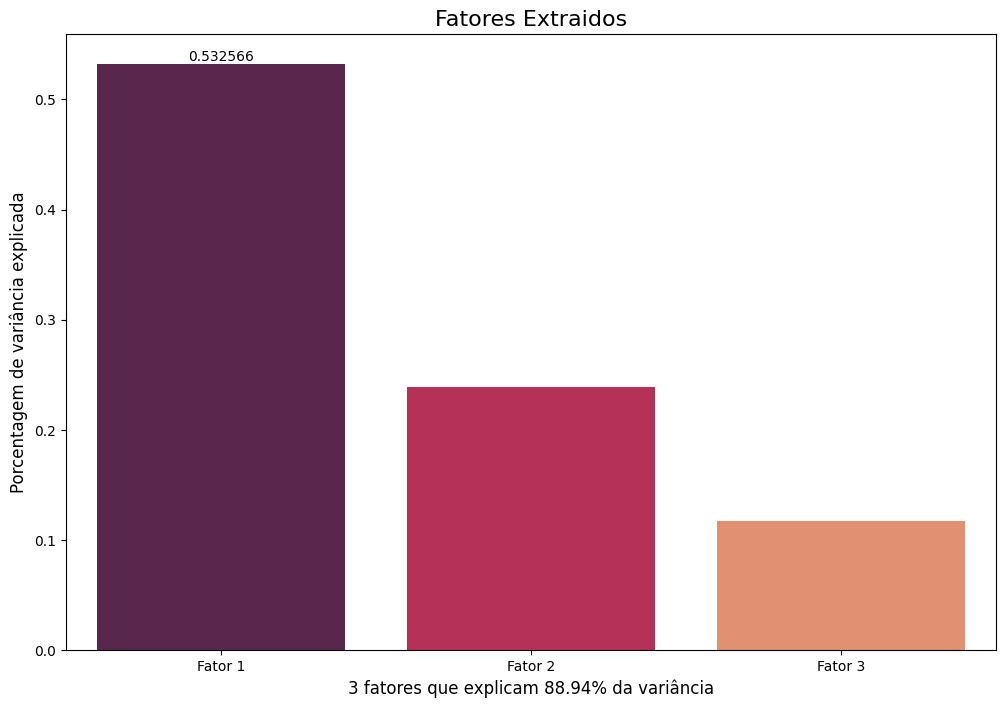

In [24]:
## ACUMULATE VARIANCE GRAPHICS

plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraidos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

In [34]:
## LOAD FACTORS
l_factors = fa.loadings_

load_table = pd.DataFrame(l_factors)
load_table.columns = [f"fator_{i+1}" for i, v in enumerate(load_table.columns)]
load_table.index = df_pca.columns

print(load_table)

                      fator_1   fator_2   fator_3
subscribers          0.749777 -0.414400  0.378710
num_videos           0.154461  0.742982 -0.363824
num_views            0.939343 -0.040709 -0.061292
last_avg_likes       0.893809  0.156563 -0.276442
last_avg_views       0.979279 -0.013922  0.139549
last_avg_comments    0.659694 -0.290794 -0.503124
num_trend_videos     0.675143 -0.487200  0.464816
mean_trend_likes     0.489321  0.805890  0.286498
mean_trend_views     0.435643  0.808071  0.333876
mean_trend_comments  0.882701 -0.133366 -0.370792


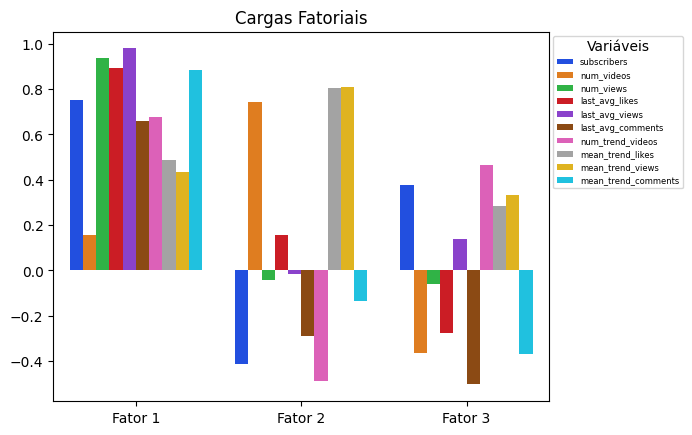

In [27]:
load_table_graph = load_table.reset_index()
load_table_graph = load_table_graph.melt(id_vars='index')

sns.barplot(data=load_table_graph, x='variable', y='value', hue='index', palette='bright')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Cargas Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

In [28]:
## COMMUNALITIES
communalities = fa.get_communalities()

commun_tables = pd.DataFrame(communalities)
commun_tables.columns = ['Comunalidades']
commun_tables.index = df_pca.columns

print(commun_tables)

                     Comunalidades
subscribers               0.877313
num_videos                0.708248
num_views                 0.887779
last_avg_likes            0.899826
last_avg_views            0.978656
last_avg_comments         0.772891
num_trend_videos          0.909236
mean_trend_likes          0.970975
mean_trend_views          0.954236
mean_trend_comments       0.934434


In [29]:
## EXTRACT FACTORS TO DATAFRAME
factors = pd.DataFrame(fa.transform(df_pca))
factors.columns =  [f"fator_{i+1}" for i, v in enumerate(factors.columns)]

# ADDING FACTORS INTO DATAFRAME SEARCH
df_search = pd.concat([df_search.reset_index(drop=True), factors], axis=1)
df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channel_name         10 non-null     string 
 1   channel_account      10 non-null     string 
 2   channel_url          10 non-null     string 
 3   subscribers          10 non-null     Int64  
 4   num_videos           10 non-null     Int64  
 5   num_views            10 non-null     Int64  
 6   last_avg_likes       10 non-null     Float64
 7   last_avg_views       10 non-null     Float64
 8   last_avg_comments    10 non-null     Float64
 9   keywords             10 non-null     object 
 10  num_trend_videos     10 non-null     int64  
 11  mean_trend_likes     10 non-null     float64
 12  mean_trend_views     10 non-null     float64
 13  mean_trend_comments  10 non-null     float64
 14  fator_1              10 non-null     float64
 15  fator_2              10 non-null     float6

In [33]:
## SCORES FACTOR
scores = fa.weights_

scores_table = pd.DataFrame(scores)
scores_table.columns = [f"fator_{i+1}" for i, v in enumerate(scores_table.columns)]
scores_table.index = df_pca.columns

print(scores_table)

                      fator_1   fator_2   fator_3
subscribers          0.145804 -0.150020  0.328555
num_videos           0.033059  0.329330 -0.304263
num_views            0.177321 -0.012666 -0.050927
last_avg_likes       0.172368  0.086428 -0.229320
last_avg_views       0.166118 -0.087945  0.095933
last_avg_comments    0.120700 -0.136217 -0.432011
num_trend_videos     0.130820 -0.184936  0.400552
mean_trend_likes    -0.007562 -0.122927  0.116236
mean_trend_views     0.182282  0.802393  0.412775
mean_trend_comments  0.179688  0.008720 -0.297518


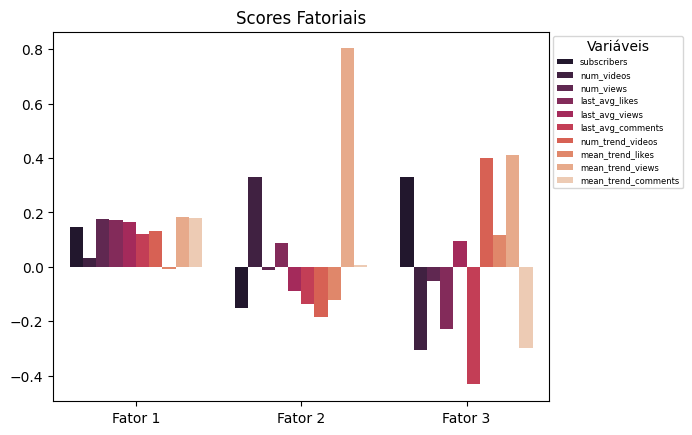

In [31]:
scores_graph = scores_table.reset_index()
scores_graph = scores_graph.melt(id_vars='index')

sns.barplot(data=scores_graph, x='variable', y='value', hue='index', palette='rocket')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

In [36]:
## weighted sum (sum the factors)
df_search['ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    df_search['ranking'] = df_search['ranking'] + df_search[tabela_eigen.index[index]]*variancia

In [50]:
## SEE CORRELATION FROM VARIABLES (PEARSON)
pg.rcorr(df_search[df_search.columns], 
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

,subscribers,num_videos,num_views,last_avg_likes,last_avg_views,last_avg_comments,num_trend_videos,mean_trend_likes,mean_trend_views,mean_trend_comments,fator_1,fator_2,fator_3,ranking
subscribers,-,,**,,***,,***,,,*,**,,,*
num_videos,-0.1856,-,,,,,,,,,,**,,
num_views,0.7435,0.2147,-,***,***,,*,,,***,***,,,***
last_avg_likes,0.4647,0.247,0.7866,-,***,**,,,,***,***,,,***
last_avg_views,0.7885,0.0742,0.9039,0.8546,-,*,**,,,***,***,,,***
last_avg_comments,0.3292,-0.0283,0.5297,0.7054,0.577,-,,,,**,**,,,
num_trend_videos,0.8599,-0.3664,0.5959,0.3662,0.7173,0.4318,-,,,,**,,,
mean_trend_likes,0.0946,0.495,0.3754,0.5009,0.5029,0.0048,0.0759,-,***,,,***,,***
mean_trend_views,0.057,0.4506,0.305,0.4506,0.4631,-0.0315,0.0631,0.9952,-,,,***,,***
mean_trend_comments,0.5859,0.1583,0.9245,0.8496,0.8018,0.7227,0.4455,0.2136,0.1365,-,***,,,**


In [53]:
## SEE CORRELATION FROM VARIABLES (PEARSON)
pg.rcorr(df_search[['ranking', 'subscribers']], 
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

,ranking,subscribers
ranking,-,*
subscribers,0.5788,-


In [55]:
## final ranking
df_search.sort_values(by=['ranking'], ascending=False)

,channel_name,channel_account,channel_url,subscribers,num_videos,num_views,last_avg_likes,last_avg_views,last_avg_comments,keywords,num_trend_videos,mean_trend_likes,mean_trend_views,mean_trend_comments,fator_1,fator_2,fator_3,ranking
3,CazéTV,@CazeTV,https://www.youtube.com/@CazeTV/videos,163000000,72000,2044152971,4667.7,111003.45,112.95,"[Cazé TV, Cazé, Casimiro, CazéTV, Brasileirão ...",5,283272.20,10963998.20,1168.4,0.941423,2.454697,1.128041,1.221218
2,ESPN Brasil,@espnbrasil,https://www.youtube.com/@espnbrasil/videos,635000000,37000,4188451631,5541.1,145446.95,190.65,"[Futebol, Brasil, FUTEBOL BRASILEIRO, EUROPA L...",10,53782.20,1321639.50,3319.4,1.638047,-0.681334,0.064494,0.716958
1,ge,@geglobo,https://www.youtube.com/@geglobo/videos,517000000,16000,2993804212,3905.75,132017.45,361.4,"[futebol, ge, globoesporte, globo, brasileirão...",19,28934.53,888902.47,2245.0,1.384777,-1.475407,0.535206,0.447452
4,TNT Sports Brasil,@TNTSportsBR,https://www.youtube.com/@TNTSportsBR/videos,112000000,85000,3010554832,3772.25,59755.95,252.95,"[esporte interativo, tnt sports, tnt sports br...",2,67575.00,1588408.50,2900.5,0.598954,0.591382,-1.801948,0.248607
5,Canal GOAT,@canalgoatbr,https://www.youtube.com/@canalgoatbr/videos,362000000,21000,343747272,656.5,25692.2,29.15,"[goat, canal goat, futebol ao vivo, transmissõ...",10,20872.80,509653.20,72.2,-0.568703,-0.685785,1.605998,-0.278118
9,Confederação Brasileira de Futebol,@CBF,https://www.youtube.com/@CBF/videos,173000000,73000,238293455,1174.1,25614.0,116.35,"[Seleção, Seleção Brasileira, CBF TV, Futebol,...",1,24623.00,744464.00,126.0,-0.683939,0.374818,-0.266620,-0.305922
7,Canal do VSR,@CanaldoVSR,https://www.youtube.com/@CanaldoVSR/videos,458000,18000,64512681,3930.95,37130.9,325.65,"[vsr, vsranking, tnt sports, Vitor Sérgio Rodr...",1,6954.00,85786.00,1372.0,-0.226595,-0.469020,-1.375308,-0.394569
8,Fluminense Football Club,@fluminensefc,https://www.youtube.com/@fluminensefc/videos,836000,59000,151220427,2453.3,21415.45,89.1,"[Fluminense, tricolor, futebol, canal oficial,...",1,7227.00,42912.00,264.0,-0.764446,0.262472,-0.576728,-0.412132
6,Sport Club Internacional,@scinternacional,https://www.youtube.com/@scinternacional/videos,398000,33000,51343037,898.8,9731.35,45.15,"[clube, do, povo, inter, beira-rio, futebol, p...",2,5325.00,49585.50,221.0,-1.023431,-0.099596,0.143925,-0.551950
0,tab BRasileirão,@tabbrasileirao,https://www.youtube.com/@tabbrasileirao/videos,133000,13000,1053577,5.0,649.65,0.15,"[tab brasileirao, tabela brasileirao, campeona...",0,0.00,0.00,0.0,-1.296088,-0.272227,0.542940,-0.691545
